<a href="https://colab.research.google.com/github/Ashahroz/k201220ThesisCode/blob/main/CICIDS2017_Thesis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/CICIDS_2017.csv')


In [4]:
print(data.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = data.drop(' Label', axis=1)  # Features
y = data[' Label']  # Labels

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the encoded data into training and testing sets
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)


In [9]:
import numpy as np

# Check for infinite values
print(np.any(np.isinf(X_train_enc)))
print(np.any(np.isinf(X_test_enc)))

# Check for NaN values
print(np.any(np.isnan(X_train_enc)))
print(np.any(np.isnan(X_test_enc)))


True
True
True
True


In [10]:
X_train_enc.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_enc.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with mean or median
X_train_enc.fillna(X_train_enc.mean(), inplace=True)
X_test_enc.fillna(X_test_enc.mean(), inplace=True)


In [13]:
from sklearn.linear_model import RidgeClassifier

# Create the Ridge Classifier model
ridge_clf = RidgeClassifier()

# Fit the model on the training data
ridge_clf.fit(X_train_enc, y_train)

# Make predictions
predictions = ridge_clf.predict(X_test_enc)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Ridge Classifier with encoded data: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.11973e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Accuracy of Ridge Classifier with encoded data: 0.9743333333333334


Accuracy: 0.9743
Precision: 0.9755
Recall: 0.9743
F1 Score: 0.9743


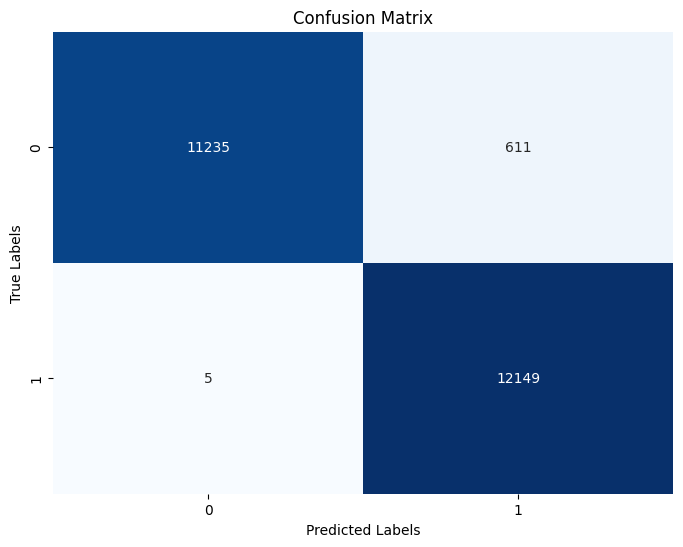

In [15]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression): 0.9901
Precision (Logistic Regression): 0.9902
Recall (Logistic Regression): 0.9901
F1 Score (Logistic Regression): 0.9901


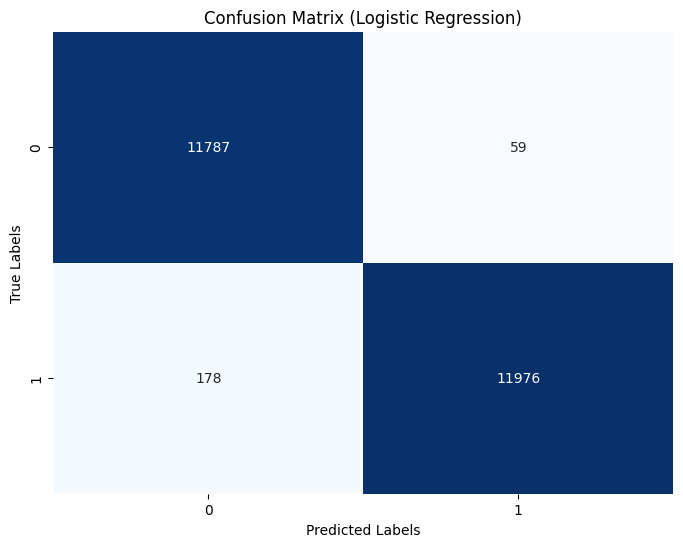

In [17]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_reg.fit(X_train_enc, y_train)

# Make predictions
logistic_predictions = logistic_reg.predict(X_test_enc)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, logistic_predictions)

# Calculate precision
precision_logistic = precision_score(y_test, logistic_predictions, average='weighted')

# Calculate recall
recall_logistic = recall_score(y_test, logistic_predictions, average='weighted')

# Calculate F1 score
f1_logistic = f1_score(y_test, logistic_predictions, average='weighted')

print(f"Accuracy (Logistic Regression): {accuracy_logistic:.4f}")
print(f"Precision (Logistic Regression): {precision_logistic:.4f}")
print(f"Recall (Logistic Regression): {recall_logistic:.4f}")
print(f"F1 Score (Logistic Regression): {f1_logistic:.4f}")

# Plot confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy (LinearSVC): 0.9462
Precision (LinearSVC): 0.9474
Recall (LinearSVC): 0.9462
F1 Score (LinearSVC): 0.9462


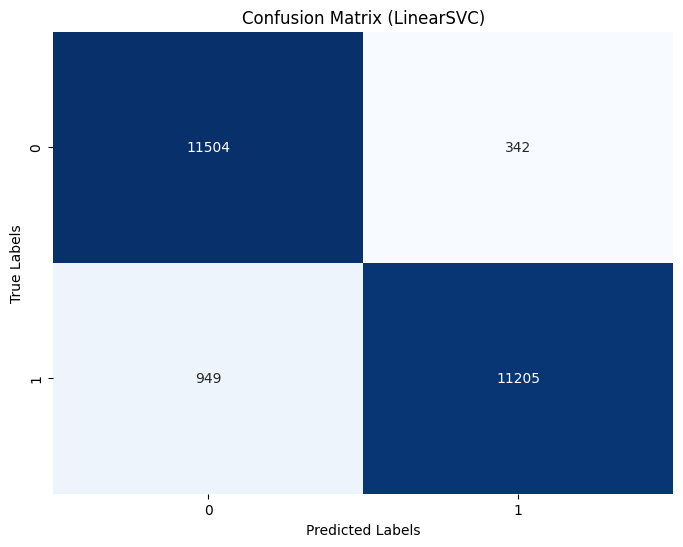

In [18]:
from sklearn.svm import LinearSVC

# Create the LinearSVC model
linear_svc = LinearSVC(max_iter=10000)

# Fit the model on the training data
linear_svc.fit(X_train_enc, y_train)

# Make predictions
linear_svc_predictions = linear_svc.predict(X_test_enc)

# Calculate accuracy
accuracy_linear_svc = accuracy_score(y_test, linear_svc_predictions)

# Calculate precision
precision_linear_svc = precision_score(y_test, linear_svc_predictions, average='weighted')

# Calculate recall
recall_linear_svc = recall_score(y_test, linear_svc_predictions, average='weighted')

# Calculate F1 score
f1_linear_svc = f1_score(y_test, linear_svc_predictions, average='weighted')

print(f"Accuracy (LinearSVC): {accuracy_linear_svc:.4f}")
print(f"Precision (LinearSVC): {precision_linear_svc:.4f}")
print(f"Recall (LinearSVC): {recall_linear_svc:.4f}")
print(f"F1 Score (LinearSVC): {f1_linear_svc:.4f}")

# Plot confusion matrix for LinearSVC
cm_linear_svc = confusion_matrix(y_test, linear_svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (LinearSVC)')
plt.show()


Accuracy (SVC): 0.9486
Precision (SVC): 0.9486
Recall (SVC): 0.9486
F1 Score (SVC): 0.9486


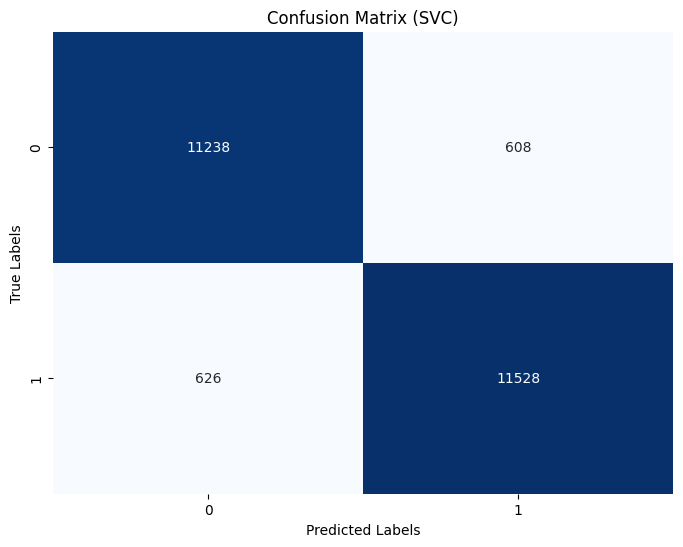

In [19]:
from sklearn.svm import SVC

# Create the SVC model
svc = SVC()

# Fit the model on the training data
svc.fit(X_train_enc, y_train)

# Make predictions
svc_predictions = svc.predict(X_test_enc)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, svc_predictions)

# Calculate precision
precision_svc = precision_score(y_test, svc_predictions, average='weighted')

# Calculate recall
recall_svc = recall_score(y_test, svc_predictions, average='weighted')

# Calculate F1 score
f1_svc = f1_score(y_test, svc_predictions, average='weighted')

print(f"Accuracy (SVC): {accuracy_svc:.4f}")
print(f"Precision (SVC): {precision_svc:.4f}")
print(f"Recall (SVC): {recall_svc:.4f}")
print(f"F1 Score (SVC): {f1_svc:.4f}")

# Plot confusion matrix for SVC
cm_svc = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVC)')
plt.show()


Accuracy (GaussianNB): 0.7237
Precision (GaussianNB): 0.8195
Recall (GaussianNB): 0.7237
F1 Score (GaussianNB): 0.6999


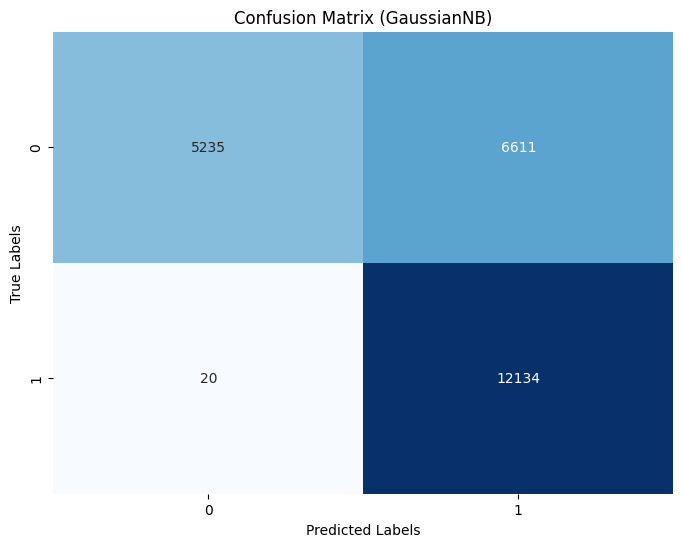

In [20]:
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train_enc, y_train)

# Make predictions
gnb_predictions = gnb.predict(X_test_enc)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, gnb_predictions)

# Calculate precision
precision_gnb = precision_score(y_test, gnb_predictions, average='weighted')

# Calculate recall
recall_gnb = recall_score(y_test, gnb_predictions, average='weighted')

# Calculate F1 score
f1_gnb = f1_score(y_test, gnb_predictions, average='weighted')

print(f"Accuracy (GaussianNB): {accuracy_gnb:.4f}")
print(f"Precision (GaussianNB): {precision_gnb:.4f}")
print(f"Recall (GaussianNB): {recall_gnb:.4f}")
print(f"F1 Score (GaussianNB): {f1_gnb:.4f}")

# Plot confusion matrix for GaussianNB
cm_gnb = confusion_matrix(y_test, gnb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (GaussianNB)')
plt.show()


Accuracy (BernoulliNB): 0.8727
Precision (BernoulliNB): 0.8976
Recall (BernoulliNB): 0.8727
F1 Score (BernoulliNB): 0.8704


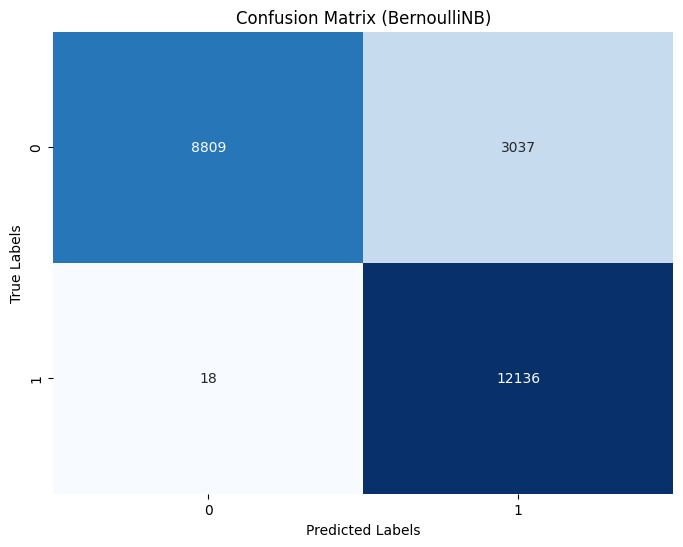

In [21]:
from sklearn.naive_bayes import BernoulliNB

# Create the Bernoulli Naive Bayes model
bnb = BernoulliNB()

# Fit the model on the training data
bnb.fit(X_train_enc, y_train)

# Make predictions
bnb_predictions = bnb.predict(X_test_enc)

# Calculate accuracy
accuracy_bnb = accuracy_score(y_test, bnb_predictions)

# Calculate precision
precision_bnb = precision_score(y_test, bnb_predictions, average='weighted')

# Calculate recall
recall_bnb = recall_score(y_test, bnb_predictions, average='weighted')

# Calculate F1 score
f1_bnb = f1_score(y_test, bnb_predictions, average='weighted')

print(f"Accuracy (BernoulliNB): {accuracy_bnb:.4f}")
print(f"Precision (BernoulliNB): {precision_bnb:.4f}")
print(f"Recall (BernoulliNB): {recall_bnb:.4f}")
print(f"F1 Score (BernoulliNB): {f1_bnb:.4f}")

# Plot confusion matrix for BernoulliNB
cm_bnb = confusion_matrix(y_test, bnb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (BernoulliNB)')
plt.show()


Accuracy (SGD Classifier): 0.9203
Precision (SGD Classifier): 0.9253
Recall (SGD Classifier): 0.9203
F1 Score (SGD Classifier): 0.9200


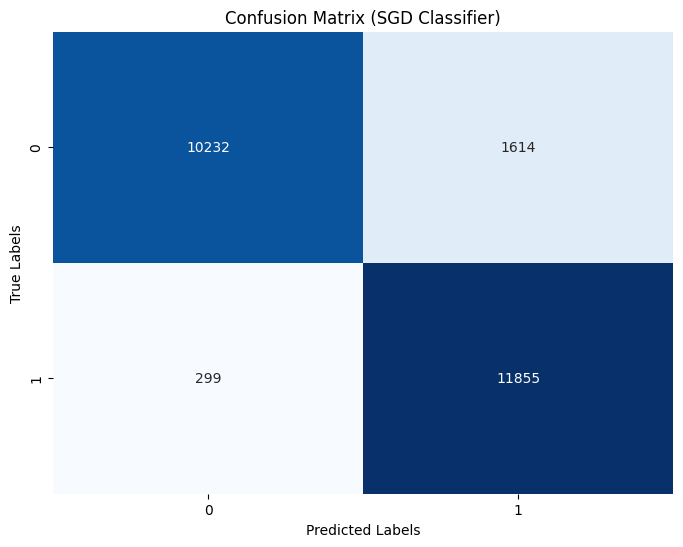

In [22]:
from sklearn.linear_model import SGDClassifier

# Create the SGD Classifier model
sgd = SGDClassifier()

# Fit the model on the training data
sgd.fit(X_train_enc, y_train)

# Make predictions
sgd_predictions = sgd.predict(X_test_enc)

# Calculate accuracy
accuracy_sgd = accuracy_score(y_test, sgd_predictions)

# Calculate precision
precision_sgd = precision_score(y_test, sgd_predictions, average='weighted')

# Calculate recall
recall_sgd = recall_score(y_test, sgd_predictions, average='weighted')

# Calculate F1 score
f1_sgd = f1_score(y_test, sgd_predictions, average='weighted')

print(f"Accuracy (SGD Classifier): {accuracy_sgd:.4f}")
print(f"Precision (SGD Classifier): {precision_sgd:.4f}")
print(f"Recall (SGD Classifier): {recall_sgd:.4f}")
print(f"F1 Score (SGD Classifier): {f1_sgd:.4f}")

# Plot confusion matrix for SGD Classifier
cm_sgd = confusion_matrix(y_test, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SGD Classifier)')
plt.show()


Accuracy (RandomForestClassifier): 0.9995
Precision (RandomForestClassifier): 0.9995
Recall (RandomForestClassifier): 0.9995
F1 Score (RandomForestClassifier): 0.9995


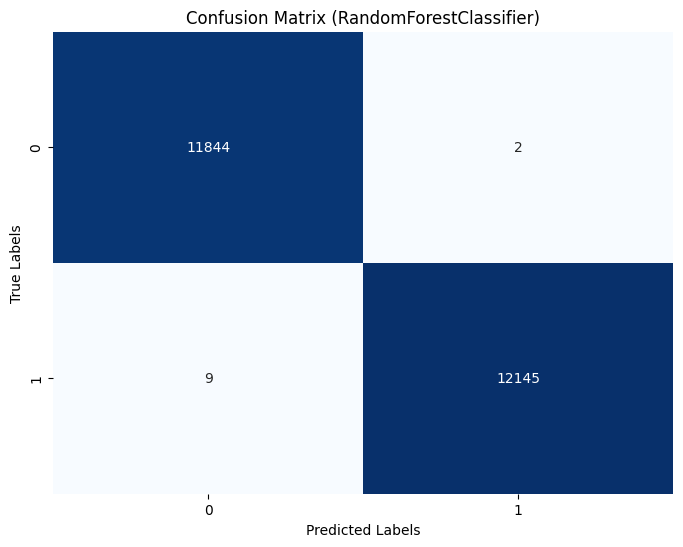

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier model
random_forest = RandomForestClassifier()

# Fit the model on the training data
random_forest.fit(X_train_enc, y_train)

# Make predictions
rf_predictions = random_forest.predict(X_test_enc)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, rf_predictions)

# Calculate precision
precision_rf = precision_score(y_test, rf_predictions, average='weighted')

# Calculate recall
recall_rf = recall_score(y_test, rf_predictions, average='weighted')

# Calculate F1 score
f1_rf = f1_score(y_test, rf_predictions, average='weighted')

print(f"Accuracy (RandomForestClassifier): {accuracy_rf:.4f}")
print(f"Precision (RandomForestClassifier): {precision_rf:.4f}")
print(f"Recall (RandomForestClassifier): {recall_rf:.4f}")
print(f"F1 Score (RandomForestClassifier): {f1_rf:.4f}")

# Plot confusion matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (RandomForestClassifier)')
plt.show()


Accuracy (ExtraTreesClassifier): 0.9995
Precision (ExtraTreesClassifier): 0.9995
Recall (ExtraTreesClassifier): 0.9995
F1 Score (ExtraTreesClassifier): 0.9995


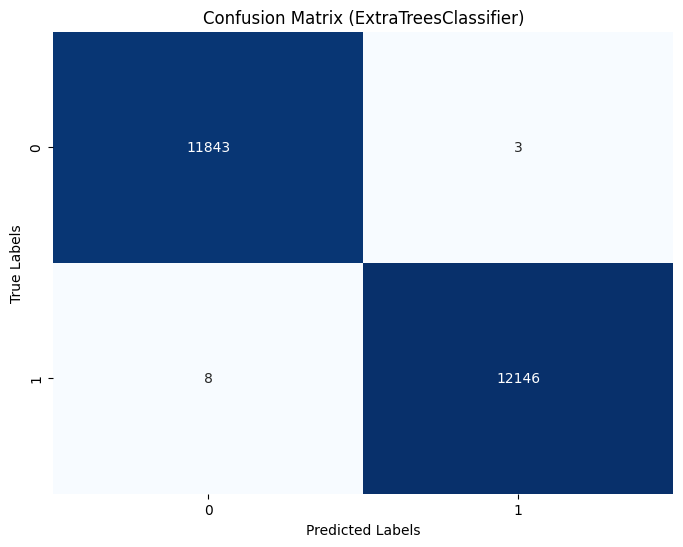

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the ExtraTreesClassifier model
extra_trees = ExtraTreesClassifier()

# Fit the model on the training data
extra_trees.fit(X_train_enc, y_train)

# Make predictions
et_predictions = extra_trees.predict(X_test_enc)

# Calculate accuracy
accuracy_et = accuracy_score(y_test, et_predictions)

# Calculate precision
precision_et = precision_score(y_test, et_predictions, average='weighted')

# Calculate recall
recall_et = recall_score(y_test, et_predictions, average='weighted')

# Calculate F1 score
f1_et = f1_score(y_test, et_predictions, average='weighted')

print(f"Accuracy (ExtraTreesClassifier): {accuracy_et:.4f}")
print(f"Precision (ExtraTreesClassifier): {precision_et:.4f}")
print(f"Recall (ExtraTreesClassifier): {recall_et:.4f}")
print(f"F1 Score (ExtraTreesClassifier): {f1_et:.4f}")

# Plot confusion matrix for ExtraTreesClassifier
cm_et = confusion_matrix(y_test, et_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_et, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (ExtraTreesClassifier)')
plt.show()


Accuracy (DecisionTreeClassifier): 0.9992
Precision (DecisionTreeClassifier): 0.9992
Recall (DecisionTreeClassifier): 0.9992
F1 Score (DecisionTreeClassifier): 0.9992


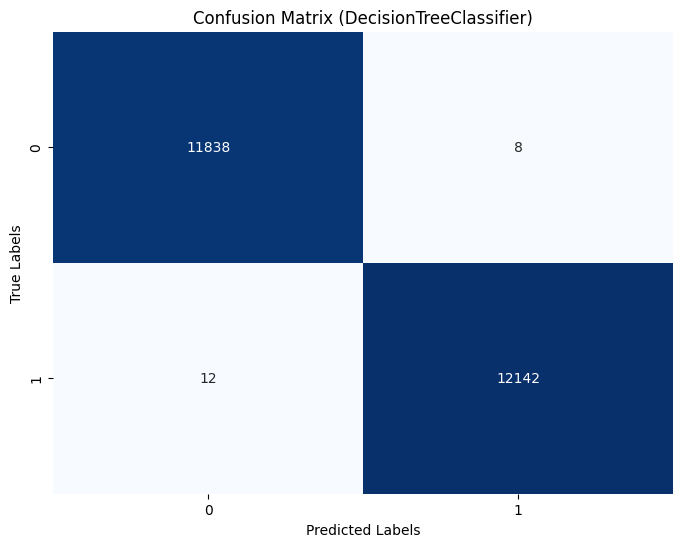

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Create the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree.fit(X_train_enc, y_train)

# Make predictions
dt_predictions = decision_tree.predict(X_test_enc)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, dt_predictions)

# Calculate precision
precision_dt = precision_score(y_test, dt_predictions, average='weighted')

# Calculate recall
recall_dt = recall_score(y_test, dt_predictions, average='weighted')

# Calculate F1 score
f1_dt = f1_score(y_test, dt_predictions, average='weighted')

print(f"Accuracy (DecisionTreeClassifier): {accuracy_dt:.4f}")
print(f"Precision (DecisionTreeClassifier): {precision_dt:.4f}")
print(f"Recall (DecisionTreeClassifier): {recall_dt:.4f}")
print(f"F1 Score (DecisionTreeClassifier): {f1_dt:.4f}")

# Plot confusion matrix for DecisionTreeClassifier
cm_dt = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (DecisionTreeClassifier)')
plt.show()


Accuracy (NearestCentroid): 0.6247
Precision (NearestCentroid): 0.7030
Recall (NearestCentroid): 0.6247
F1 Score (NearestCentroid): 0.5875


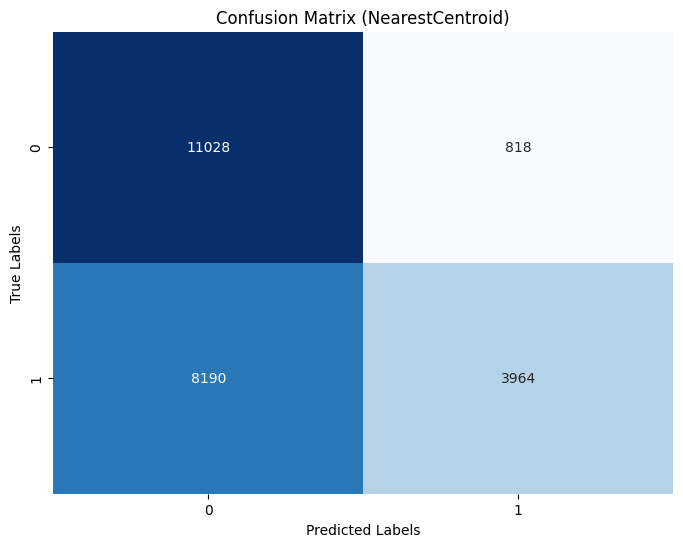

In [26]:
from sklearn.neighbors import NearestCentroid

# Create the NearestCentroid model
nearest_centroid = NearestCentroid()

# Fit the model on the training data
nearest_centroid.fit(X_train_enc, y_train)

# Make predictions
nc_predictions = nearest_centroid.predict(X_test_enc)

# Calculate accuracy
accuracy_nc = accuracy_score(y_test, nc_predictions)

# Calculate precision
precision_nc = precision_score(y_test, nc_predictions, average='weighted')

# Calculate recall
recall_nc = recall_score(y_test, nc_predictions, average='weighted')

# Calculate F1 score
f1_nc = f1_score(y_test, nc_predictions, average='weighted')

print(f"Accuracy (NearestCentroid): {accuracy_nc:.4f}")
print(f"Precision (NearestCentroid): {precision_nc:.4f}")
print(f"Recall (NearestCentroid): {recall_nc:.4f}")
print(f"F1 Score (NearestCentroid): {f1_nc:.4f}")

# Plot confusion matrix for NearestCentroid
cm_nc = confusion_matrix(y_test, nc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (NearestCentroid)')
plt.show()


Accuracy (LinearDiscriminantAnalysis): 0.9743
Precision (LinearDiscriminantAnalysis): 0.9755
Recall (LinearDiscriminantAnalysis): 0.9743
F1 Score (LinearDiscriminantAnalysis): 0.9743


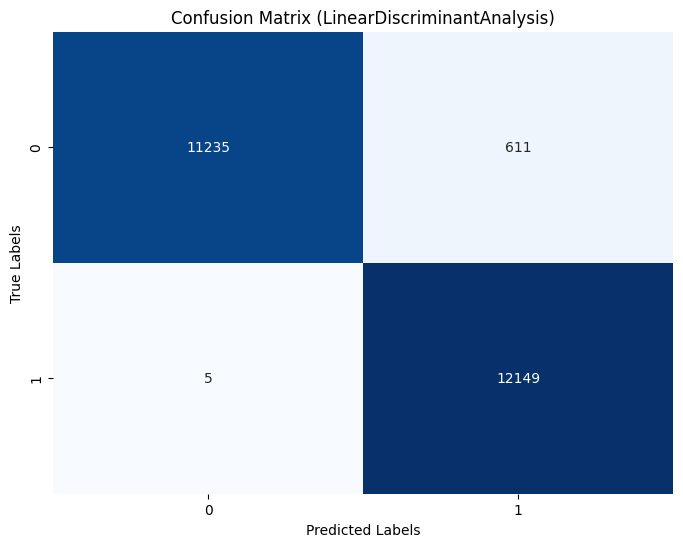

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the LinearDiscriminantAnalysis model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train_enc, y_train)

# Make predictions
lda_predictions = lda.predict(X_test_enc)

# Calculate accuracy
accuracy_lda = accuracy_score(y_test, lda_predictions)

# Calculate precision
precision_lda = precision_score(y_test, lda_predictions, average='weighted')

# Calculate recall
recall_lda = recall_score(y_test, lda_predictions, average='weighted')

# Calculate F1 score
f1_lda = f1_score(y_test, lda_predictions, average='weighted')

print(f"Accuracy (LinearDiscriminantAnalysis): {accuracy_lda:.4f}")
print(f"Precision (LinearDiscriminantAnalysis): {precision_lda:.4f}")
print(f"Recall (LinearDiscriminantAnalysis): {recall_lda:.4f}")
print(f"F1 Score (LinearDiscriminantAnalysis): {f1_lda:.4f}")

# Plot confusion matrix for LinearDiscriminantAnalysis
cm_lda = confusion_matrix(y_test, lda_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (LinearDiscriminantAnalysis)')
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, TimeDistributed
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#from pycm import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler  # For class imbalance handling
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import csv

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.40, random_state=42)

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Embedding

# Assuming 'data' is your DataFrame containing the dataset

# Prepare input data and labels
X = data.drop(' Label', axis=1)  # Features
y = data[' Label']  # Labels

# Convert categorical features to numerical using one-hot encoding or label encoding
# Assuming 'protocol_type', 'service', and 'flag' are categorical features
X_categorical = X[[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes','Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward','Active Mean', ' Active Std', ' Active Max', ' Active Min','Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']]  # Selecting all columns except 'Label'
X_categorical_encoded = pd.get_dummies(X_categorical)

# Convert labels to numerical values if needed

# Tokenize the text data
tokenizer = Tokenizer()
text_data = X_categorical_encoded.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences to a fixed length
max_sequence_length = 50  # Define your sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.4, random_state=42)


In [33]:
# Check unique labels in y_train and y_test
unique_labels_train = set(y_train)
unique_labels_test = set(y_test)

# Identify any unseen labels in y_test compared to y_train
unseen_labels_test = unique_labels_test - unique_labels_train

if unseen_labels_test:
    # Handle unseen labels by either removing corresponding samples or mapping them to a common label
    print(f"Unseen labels in y_test: {unseen_labels_test}")
else:
    print("All labels in y_test are present in y_train.")


All labels in y_test are present in y_train.


In [36]:
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on training labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())

# Transform test labels using the same encoder
y_test_encoded = label_encoder.transform(y_test.values.ravel())


In [37]:
print(X_train.shape)



(35999, 50, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels in y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Use the encoded labels for training
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
508/508 [==============================] - 46s 74ms/step - loss: 1.0596 - accuracy: 0.7382 - val_loss: 0.6120 - val_accuracy: 0.8376
Epoch 2/5
508/508 [==============================] - 37s 72ms/step - loss: 0.4498 - accuracy: 0.8713 - val_loss: 0.4223 - val_accuracy: 0.8825
Epoch 3/5
508/508 [==============================] - 37s 72ms/step - loss: 0.3191 - accuracy: 0.9039 - val_loss: 0.2696 - val_accuracy: 0.9185
Epoch 4/5
508/508 [==============================] - 36s 71ms/step - loss: 0.2582 - accuracy: 0.9214 - val_loss: 0.2480 - val_accuracy: 0.9285
Epoch 5/5
508/508 [==============================] - 38s 75ms/step - loss: 0.2227 - accuracy: 0.9324 - val_loss: 0.2119 - val_accuracy: 0.9407


In [41]:
from keras.layers import Bidirectional

# Reshape X_train for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Check the new shape of X_train
print(X_train.shape)

# Define your Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_labels)
precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


(35999, 50, 1)
Epoch 1/5
1013/1013 [==============================] - 127s 116ms/step - loss: 0.0646 - accuracy: 0.9763 - val_loss: 0.0093 - val_accuracy: 0.9986
Epoch 2/5
1013/1013 [==============================] - 106s 105ms/step - loss: 0.0091 - accuracy: 0.9978 - val_loss: 0.0202 - val_accuracy: 0.9958
Epoch 3/5
1013/1013 [==============================] - 110s 109ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0101 - val_accuracy: 0.9981
Epoch 4/5
1013/1013 [==============================] - 118s 116ms/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 0.0111 - val_accuracy: 0.9992
Epoch 5/5
750/750 [==============================] - 23s 28ms/step
Accuracy: 0.9987916666666666, Precision: 0.9987916714235163, Recall: 0.9987916666666666, F1 Score: 0.9987916673107969


In [39]:
num_classes = len(np.unique(y_train))


In [40]:
# Reshape X_train for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Check the new shape of X_train
print(X_train.shape)

# Define your stacked LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=32))  # Adding the second LSTM layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_labels)
precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


(35999, 50, 1)
Epoch 1/5
1013/1013 [==============================] - 67s 60ms/step - loss: 0.0555 - accuracy: 0.9817 - val_loss: 0.0093 - val_accuracy: 0.9989
Epoch 2/5
1013/1013 [==============================] - 63s 62ms/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0079 - val_accuracy: 0.9989
Epoch 3/5
1013/1013 [==============================] - 60s 60ms/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.0076 - val_accuracy: 0.9989
Epoch 4/5
1013/1013 [==============================] - 82s 81ms/step - loss: 0.0075 - accuracy: 0.9986 - val_loss: 0.0107 - val_accuracy: 0.9986
Epoch 5/5
750/750 [==============================] - 13s 16ms/step
Accuracy: 0.999, Precision: 0.9990000597315554, Recall: 0.999, F1 Score: 0.9990000021114499


In [42]:
# Reshape X_train for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Check the new shape of X_train
print(X_train.shape)

# Define your Vanilla LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape X_test similarly
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_labels)
precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


(35999, 50, 1)
Epoch 1/5
1013/1013 [==============================] - 34s 31ms/step - loss: 0.1119 - accuracy: 0.9619 - val_loss: 0.0168 - val_accuracy: 0.9981
Epoch 2/5
1013/1013 [==============================] - 31s 31ms/step - loss: 0.0106 - accuracy: 0.9985 - val_loss: 0.0107 - val_accuracy: 0.9986
Epoch 3/5
1013/1013 [==============================] - 31s 31ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.0181 - val_accuracy: 0.9969
Epoch 4/5
1013/1013 [==============================] - 31s 31ms/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0095 - val_accuracy: 0.9986
Epoch 5/5
750/750 [==============================] - 8s 10ms/step
Accuracy: 0.999, Precision: 0.9990001311866216, Recall: 0.999, F1 Score: 0.9990000031463314


In [43]:
from keras.layers import GRU

# Reshape X_train for GRU input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Check the new shape of X_train
print(X_train.shape)

# Define your GRU model
model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape X_test similarly
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_labels)
precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


(35999, 50, 1)
Epoch 1/5
1013/1013 [==============================] - 35s 31ms/step - loss: 0.1076 - accuracy: 0.9496 - val_loss: 0.0111 - val_accuracy: 0.9975
Epoch 2/5
1013/1013 [==============================] - 30s 30ms/step - loss: 0.0126 - accuracy: 0.9972 - val_loss: 0.0627 - val_accuracy: 0.9892
Epoch 3/5
1013/1013 [==============================] - 31s 30ms/step - loss: 0.0084 - accuracy: 0.9983 - val_loss: 0.0063 - val_accuracy: 0.9992
Epoch 4/5
1013/1013 [==============================] - 31s 31ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.0068 - val_accuracy: 0.9986
Epoch 5/5
750/750 [==============================] - 8s 9ms/step
Accuracy: 0.9988333333333334, Precision: 0.9988333837772634, Recall: 0.9988333333333334, F1 Score: 0.9988333308051283


In [44]:
from keras.layers import LSTM

# Reshape X_train for Peephole LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Check the new shape of X_train
print(X_train.shape)

# Define your Peephole LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), implementation=2))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape X_test similarly
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_labels)
precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


(35999, 50, 1)
Epoch 1/5
1013/1013 [==============================] - 36s 33ms/step - loss: 0.1137 - accuracy: 0.9612 - val_loss: 0.0168 - val_accuracy: 0.9958
Epoch 2/5
1013/1013 [==============================] - 33s 33ms/step - loss: 0.0123 - accuracy: 0.9974 - val_loss: 0.0100 - val_accuracy: 0.9986
Epoch 3/5
1013/1013 [==============================] - 33s 32ms/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0205 - val_accuracy: 0.9961
Epoch 4/5
1013/1013 [==============================] - 33s 32ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.0092 - val_accuracy: 0.9983
Epoch 5/5
750/750 [==============================] - 9s 11ms/step
Accuracy: 0.99875, Precision: 0.9987500111824454, Recall: 0.99875, F1 Score: 0.9987499986542894


In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense

# Assuming X_train, y_train_encoded, X_test, y_test_encoded are defined

# Reshape X_train for LSTM-CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Reshape X_test similarly
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define your LSTM-CNN hybrid model
model = Sequential()

# Add Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Add LSTM layer
model.add(LSTM(units=64))

# Dense layer for classification
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_labels)
precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Epoch 1/5
1013/1013 [==============================] - 27s 24ms/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.0099 - val_accuracy: 0.9986
Epoch 2/5
1013/1013 [==============================] - 26s 25ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0100 - val_accuracy: 0.9983
Epoch 3/5
1013/1013 [==============================] - 23s 23ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0084 - val_accuracy: 0.9989
Epoch 4/5
1013/1013 [==============================] - 26s 25ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0080 - val_accuracy: 0.9989
Epoch 5/5
750/750 [==============================] - 6s 7ms/step
Accuracy: 0.999125, Precision: 0.9991251764179668, Recall: 0.999125, F1 Score: 0.9991250032012414


In [ ]:
import pandas as pd


# Display unique classes in the 'labels' column
unique_classes = data['labels'].unique()
print("Unique Classes:", unique_classes)


Unique Classes: ['normal' 'portsweep' 'neptune' 'smurf' 'satan' 'apache2' 'teardrop'
 'guess_passwd' 'ipsweep' 'warezclient' 'nmap' 'warezmaster' 'mscan'
 'back' 'pod' 'httptunnel' 'processtable' 'mailbomb' 'snmpguess' 'saint'
 'multihop' 'snmpgetattack' 'buffer_overflow' 'xsnoop' 'imap' 'ps'
 'rootkit' 'land' 'xterm' 'sendmail' 'phf' 'loadmodule' 'perl' 'xlock'
 'ftp_write' 'named']


In [46]:
from keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Add, Concatenate
from keras.models import Model

# Assuming X_train, y_train_encoded, X_test, y_test_encoded are defined

# Reshape X_train for LSTM-CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Reshape X_test similarly
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# Convolutional layers
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# LSTM layer
lstm1 = LSTM(units=64, return_sequences=True)(pool1)
lstm2 = LSTM(units=64, return_sequences=True)(lstm1)

# Padding the Conv1D output to adjust shapes for concatenation
conv1_padded = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)

# Skip connection by concatenating the output of Conv1D with LSTM output
skip_connection = Concatenate(axis=-2)([lstm2, conv1_padded])

# Flatten layer
flat = Flatten()(skip_connection)

# Dense layer for classification
output_layer = Dense(units=num_classes, activation='softmax')(flat)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_labels)
precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Epoch 1/5
1013/1013 [==============================] - 57s 50ms/step - loss: 17.7553 - accuracy: 0.9314 - val_loss: 0.7537 - val_accuracy: 0.9964
Epoch 2/5
1013/1013 [==============================] - 54s 53ms/step - loss: 0.3991 - accuracy: 0.9952 - val_loss: 0.1435 - val_accuracy: 0.9992
Epoch 3/5
1013/1013 [==============================] - 49s 48ms/step - loss: 0.0634 - accuracy: 0.9980 - val_loss: 0.0263 - val_accuracy: 0.9994
Epoch 4/5
1013/1013 [==============================] - 50s 50ms/step - loss: 0.0095 - accuracy: 0.9990 - val_loss: 0.0093 - val_accuracy: 0.9994
Epoch 5/5
750/750 [==============================] - 11s 13ms/step
Accuracy: 0.9990833333333333, Precision: 0.9990838442520984, Recall: 0.9990833333333333, F1 Score: 0.9990833389869711


In [47]:
from keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Concatenate, Activation, Dot
from keras.models import Model

# Assuming X_train, y_train_encoded, X_test, y_test_encoded are defined

# Reshape X_train for LSTM-CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Reshape X_test similarly
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# Convolutional layers
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# LSTM layer
lstm1 = LSTM(units=64, return_sequences=True)(pool1)
lstm2 = LSTM(units=64, return_sequences=True)(lstm1)

# Attention mechanism
attention = Dense(1, activation='tanh')(lstm2)
attention = Flatten()(attention)
attention = Activation('softmax')(attention)
attention = Dot(axes=1)([attention, lstm2])

# Flatten layer
flat = Flatten()(attention)

# Dense layer for classification
output_layer = Dense(units=num_classes, activation='softmax')(flat)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_labels)
precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Epoch 1/5
1013/1013 [==============================] - 53s 46ms/step - loss: 0.0391 - accuracy: 0.9887 - val_loss: 0.0079 - val_accuracy: 0.9986
Epoch 2/5
1013/1013 [==============================] - 43s 42ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.0151 - val_accuracy: 0.9953
Epoch 3/5
1013/1013 [==============================] - 45s 45ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0112 - val_accuracy: 0.9975
Epoch 4/5
1013/1013 [==============================] - 45s 44ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0054 - val_accuracy: 0.9992
Epoch 5/5
750/750 [==============================] - 11s 13ms/step
Accuracy: 0.9991666666666666, Precision: 0.9991670222734295, Recall: 0.9991666666666666, F1 Score: 0.999166670978674
